# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

## Introducción al Aprendizaje Automático

### Laboratorio 2: Armado de un esquema de aprendizaje automático

Grupo 30:

- Camino, Fernando
- Herrador, Emanuel Nicolás
- Rapoport, Juana
- Stutz, Sebastián
- Szurlewicz, Juan Ignacio

---


## Índice


- [1. Introducción](#1-introducción)
- [2. Desarrollo previo](#2-desarrollo-previo)
  - [2.1. Importación de librerías](#21-importación-de-librerías)
  - [2.2. Carga de datos](#22-carga-de-datos)
- [3. Análisis de los datos](#3-análisis-de-los-datos)
  - [3.1. Descripción del dataset](#31-descripción-del-dataset)
  - [3.2. Análisis exploratorio inicial (feature - target)](#32-análisis-exploratorio-inicial-feature---target)
  - [3.3. Relación entre variables ($2$ features - target)](#33-relación-entre-variables--features---target)
  - [3.4. ¿Qué variables serán las más determinantes?](#34-qué-variables-serán-las-más-determinantes)
- [4. Transformación de datos](#4-transformación-de-los-datos)
  - [4.1. Análisis de outliers](#41-análisis-de-outliers)
  - [4.2. Análisis de correlaciones](#42-análisis-de-correlaciones)
  - [4.3. División entre target y variables](#43-división-entre-target-y-variables)
  - [4.4. Escalado de los datos](#44-escalado-de-los-datos)
  - [4.5. División en conjuntos de entrenamiento y evaluación](#45-división-en-conjuntos-de-entrenamiento-y-de-evaluación)
- [5. Predicción de _Target_](#5-predicción-de-target)
  - [5.1. Modelos de Clasificación Lineales](#51-modelos-de-clasificación-lineales)
    - [5.1.1. Modelos Lineales de Clasificación con hiperparámetros por defecto](#511-modelos-lineales-de-clasificación-con-hiperparámetros-por-defecto)
    - [5.1.2. Modelos Lineales de Clasificación con hiperparámetros ajustados](#512-modelos-lineales-de-clasificación-con-hiperparámetros-ajustados)
  - [5.2. Modelos de Árboles de Decisión](#52-modelos-de-árboles-de-decisión)
    - [5.2.1. Modelos de Árboles de Decisión con hiperparámetros por defecto](#521-modelos-de-árboles-de-decisión-con-hiperparámetros-por-defecto)
    - [5.2.2. Modelos de Árboles de Decisión con hiperparámetros ajustados](#522-modelos-de-árboles-de-decisión-con-hiperparámetros-ajustados)
  - [5.3. Comparación de Modelos](#53-comparación-de-modelos)
- [6. Conclusiones](#6-conclusiones)


## 1. Introducción


En el presente laboratorio, se propone la implementación y el análisis de rendimiento de diferentes Modelos de Clasificación Lineales y Árboles de Decisión, considerando tanto los hiperparámetros _por defecto_, como así también su posterior ajuste mediante _Grid Search_.

De este modo, se buscará evaluar el rendimiento de cada modelo (y posteriormente hacer una comparativa) en los conjuntos de entrenamiento y evaluación, midiendo la _exactitud_, la _precisión_, el _recall_ y el _f1-score_ de cada uno de ellos.

El objetivo que se persigue con este trabajo es poner en práctica los conocimientos adquiridos en la materia, trabajando con un conjunto de datos real e introducirnos en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

Respecto al [_dataset_](https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv) que se va a considerar, este está basado en el dataset de [_Kaggle Home Equity_](https://www.kaggle.com/ajay1735/hmeq-data) y contiene información de referencia y desempeño de préstamos hipotecarios "recientes".


## 2. Desarrollo previo


### 2.1. Importación de librerías


Las librerías que usaremos en el presente proyecto son las siguientes:


In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
from sklearn.exceptions import ConvergenceWarning

# Seteamos la seed para reproducibilidad
random_seed = 10
np.random.seed(random_seed)

# Ignoramos warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### 2.2. Carga de datos


Ahora, se procederá a cargar el dataset _loan_data_ para tenerlo disponible en la realización del laboratorio.


In [2]:
# Leer dataset con los comentarios
file_url = 'https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv'
df = pd.read_csv(file_url, comment="#")

# Mostrar los primeros registros
df.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


## 3. Análisis de los datos


### 3.1. Descripción del dataset


El _dataset_ contiene datos recopilados de solicitantes recientes de créditos a quienes se les otorgó mediante el proceso de suscripción de préstamos. Contiene información de referencia y desempeño de los préstamos, junto con una variable que indica si el solicitante finalmente incumplió o no con el préstamo.

En definitiva, los datos de los que disponemos son:

- _Target_: variable objetivo que indica si el solicitante incumplió o no con el préstamo ($1$ en caso afirmativo, $0$ sino).
- _Loan_: monto de la solicitud del préstamo.
- _MortDue_: monto adeudado de la hipoteca existente.
- _Value_: valor de la propiedad actual
- _YoJ_: años en el trabajo actual
- _Derog_: número de informes negativos importantes
- _Delinq_: número de líneas de crédito morosas
- _ClAge_: antigüedad de la línea de crédito más antigua (en meses)
- _NInq_: número de líneas de crédito recientes
- _ClNo_: número de líneas de crédito
- _DebTInc_: relación deuda-ingreso


Respecto a la predicción de _Target_, muchos factores incluidos en el dataset pueden influir en la probabilidad de que un solicitante incumpla con el préstamo, aunque muchos de ellos pueden estar correlacionados entre sí.


### 3.2. Análisis exploratorio inicial (feature - target)


En este punto, vamos a analizar nuestras variables y su relación con la variable objetivo (`Target`), para poder entender mejor los datos con los que estamos trabajando y encontrar las formas más adecuadas de procesarlos, dividirlos o transformarlos.

Por ello mismo, primero grafiquemos las distribuciones de cada _feature_ y su relación con el hecho de que el solicitante haya incumplido o no con el préstamo.


In [3]:
def plot_simple_histogram(df, x, y, z=None, nbins=20, box=True):
    if x not in df.columns:
        return

    marginal = 'box' if box else None
    title = f'Histograma de {x}'
    fig = px.histogram(df, x=x, color=y, pattern_shape=z,
                       marginal=marginal, title=title, nbins=nbins, text_auto=True)
    fig.update_layout(bargap=0.1, xaxis_title=x,
                      yaxis_title='Frecuencia', height=600)
    fig.show()


def plot_all_histograms(df, y, z=None):
    plot_simple_histogram(df, 'TARGET', y, nbins=None, box=False)
    plot_simple_histogram(df, 'LOAN', y, z=z)
    plot_simple_histogram(df, 'MORTDUE', y, z=z)
    plot_simple_histogram(df, 'VALUE', y, z=z)
    plot_simple_histogram(df, 'YOJ', y, z=z)
    plot_simple_histogram(df, 'DEROG', y, z=z)
    plot_simple_histogram(df, 'DELINQ', y, z=z)
    plot_simple_histogram(df, 'CLAGE', y, z=z)
    plot_simple_histogram(df, 'NINQ', y, z=z)
    plot_simple_histogram(df, 'CLNO', y, z=z)
    plot_simple_histogram(df, 'DEBTINC', y, z=z)

In [4]:
plot_all_histograms(df, 'TARGET')

Gracias a lo cual podemos notar varias cosas:

- Nuestro dataset no contiene muchos datos, dado que tiene un total de $1854$ observaciones.
- El dataset está _desbalanceado_, ya que la cantidad de observaciones que cumplen con el préstamo es mucho mayor que las que no. Se encuentra una diferencia de $1545$ observaciones contra $309$. Es decir, aproximadamente $83\%$ de los datos corresponden a la clase $0$ y el $17\%$ a la clase $1$.
- La variable _loan_ contiene muchos outliers a derecha (valores muy altos) y no se encuentra una relación muy clara con la variable objetivo, dado que se encuentra distribuida de manera similar en ambas clases.
- Pasa lo mismo con la variable _MortDue_, sumado al hecho de que se presentan $8$ registros con valores totalmente atípicos, siendo casi $4$ veces más altos que los valores que presentan mayor densidad de registros.
- Con _Value_ y _YoJ_ sucede algo similar, aunque en menor medida.
- Ahora, con _Derog_ y _Delinq_, estas son variables que nos dan una clara división de algunos (no muchos) registros que incumplieron con el préstamo. Aquí, podemos observar que todos los registros con valores mayores o iguales a $4$ en _Derog_ o a $5$ en _Delinq_ incumplieron con el préstamo. Luego, esto nos indica que estas variables pueden ser muy importantes para predecir la variable objetivo.
- _ClAge_, _NInq_ y _ClNo_ se encuentran distribuidas de forma similar en ambas clases (con ciertas diferencias, pero no tan marcadas como en las variables anteriores).
- Por último, respecto a _DebTInc_, se observa una franja muy marcada de división para los registros con valores extremos que no cumplieron con el préstamo. Podemos observar que:
  - Todos los valores menores a $4.02$ incumplieron con el préstamo (son $4$ en total).
  - Todos los valores mayores a $45.6$ incumplieron con el préstamo (son $62$ en total).


### 3.3. Relación entre variables ($2$ features - target)


Una forma más de visualizar las relaciones con la variable objetivo es mediante la realización de una matriz de _scatter plots_ (i.e., un _pairplot_). De este modo, podemos observar cómo se relacionan las variables entre sí y con la variable objetivo.

Podemos notarlo a continuación:


In [5]:
def plot_scatter_matrix(df, x, columns):
    df2 = df.copy()
    df2[x] = df2[x].astype(str)

    dimensions = columns - {x}
    fig = px.scatter_matrix(df2, dimensions=dimensions, color=x)
    fig.update_layout(width=1200, height=1200,
                      title=f'Matriz de dispersión de {x}')
    fig.show()


plot_scatter_matrix(df, 'TARGET', set(df.columns))

Gracias a ello, podemos observar que las relaciones más importantes que nos brindan información respecto a la clasificación de los registros son todos los pares que involucran a las features _DelInq_, _NInq_, _Derog_ y _DebTInc_. En estos casos, se observa una clara división entre los registros que incumplieron con el préstamo y los que no.

Para verlo más claramente, grafiquemos solo esa sección de la matriz de _scatter plots_:


In [6]:
plot_scatter_matrix(df, 'TARGET', {'DELINQ', 'DEROG', 'NINQ', 'DEBTINC'})

Gracias a lo cual, si usamos la opción interactiva de plotly, podemos notar que estas relaciones nos ayudan muchísimo para la clasificación de nuestro modelo con estos datos desbalanceados, ya que establece una división muy clara entre los registros que incumplieron con el préstamo y los que no (notar la diferencia seleccionando solo _target 0_ y luego _target 1_).


### 3.4. ¿Qué variables serán las más determinantes?


Por lo visto anteriormente, consideraremos que las variables más determinantes para la clasificación de los registros serán:

- Pre-existencia morosa del cliente: _Derog_ y _Delinq_.
- Relación deuda-ingreso: _DebTInc_.
- Número de líneas de crédito recientes: _NInq_.


## 4. Transformación de los datos


### 4.1. Análisis de outliers


En este punto, analizaremos los valores atípicos presentes en nuestro dataset, por lo que haremos uso de la gráfica _boxplot_ para visualizarlos.


In [7]:
def plot_box_plot(df, show_target=False):
    fig = make_subplots(rows=3, cols=4)

    for i, column in enumerate(df.columns):
        if i == 0:
            continue

        row = (i - 1) // 4 + 1
        col = (i - 1) % 4 + 1
        fig.add_trace(go.Box(y=df[column], x=df['TARGET'] if show_target else None, name=column),
                      row=row, col=col)

    fig.update_layout(height=800, width=1000,
                      title_text="Boxplot de las variables del dataset")
    fig.show()


plot_box_plot(df)

Aquí, podemos observar que nuestros datos contienen una gran cantidad de valores atípicos en todas las variables y con gran diferencia respecto a la media y la mediana de los datos.

Por ello mismo, para evitar que estos valores atípicos afecten el rendimiento de nuestros modelos, podríamos pensar quedarnos con los valores que se encuentren debajo del percentil $99$ de todas las variables. Sin embargo, haciendo esto, perderíamos una gran cantidad de datos (y tenemos pocos), y encima la gran mayoría son de la clase minoritaria (los que incumplieron con el préstamo). Esto lo podemos ver claramente con los boxplot por target:


In [8]:
plot_box_plot(df, show_target=True)

Por ello mismo, entonces, para evitar perder información **muy** valiosa y sesgar nuestros datos, decidimos no eliminar los valores atípicos de nuestro dataset, dado que estos pueden ser muy importantes para la clasificación de los registros y pueden ser fácilmente reconocibles por nuestros modelos si elegimos las variables adecuadas que dividan claramente las clases (las que ya identificamos en el análisis exploratorio de los datos).


### 4.2. Análisis de correlaciones


A fines prácticos y de convalidar lo analizado en el anterior punto sobre la descripción de los valores de nuestro dataset (que muchas variables pueden estar correlacionadas), analizaremos la correlación entre las diferentes variables.

Por ello mismo, haremos uso de la matriz de correlación:


In [9]:
def plot_corr(df):
    corr = df.corr()

    fig = go.Figure(data=go.Heatmap(z=corr, x=corr.columns,
                    y=corr.columns, colorscale='Viridis'))
    fig.update_layout(height=800, width=800,
                      title_text="Correlación entre variables")

    fig.show()


plot_corr(df)

Gracias a lo cual, podemos observar que no nos encontrábamos en lo correcto acerca de la correlación entre las variables, ya que la mayor se da únicamente entre _mortdue_ y _value_ con $0.87$.

Por ello mismo, este es un factor importantísimo que nos indica que todas las columnas que tenemos son relevantes para la predicción, dado que no se correlacionan linealmente entre ellas.


### 4.3. División entre target y variables


Para proseguir luego con el escalado de los datos y, posteriormente, con la división en los conjuntos de entrenamiento y evaluación, primero lo que haremos será dividir nuestras columnas en el target (y) y las features (X):


In [10]:
X, y = df.iloc[:, 1:], df.TARGET

print(f"X columns: {X.columns}")
print(f"y columns: {y.name}")

X columns: Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')
y columns: TARGET


De ese modo, podemos proseguir con el análisis y la manipulación de los datos.


### 4.4. Escalado de los datos


Dado que los valores de nuestras variables tienen distinto peso entre sí y es muy notable (_value_ vs. _derog_ por ejemplo), para evitar que nuestro modelo y nuestras posteriores predicciones se vean afectadas por ello, decidimos escalar los datos con el uso del _RobustScaler_ (usamos este dado que es más robusto a la presencia de outliers). Así, tenemos que:


In [11]:
X2 = RobustScaler().fit_transform(X)
display(pd.DataFrame(X2, columns=X.columns).head())

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.033613,0.465397,0.408285,-0.1,0.0,0.0,0.063149,-0.5,0.545455,-0.619728
1,0.193277,-0.609541,0.134319,-0.3,0.0,0.0,-0.302852,-0.5,-0.636364,-0.384432
2,-0.949580,0.097326,-0.280902,-0.5,0.0,0.0,-0.714060,-0.5,-0.545455,0.588736
3,-0.336134,-0.498941,-0.699094,-0.7,1.0,0.0,0.086932,0.0,-0.818182,-0.680846
4,0.193277,0.124054,0.227749,0.4,0.0,0.0,0.162539,0.0,-0.727273,-0.470990


Luego, con ello podemos asegurarnos que ninguna variable va a tener un peso mayor en la _predicción_ simplemente por su escala.


### 4.5. División en conjuntos de entrenamiento y de evaluación


Finalmente, para preparar nuestro conjunto de datos para la elección de los modelos de clasificación, dividiremos nuestros datos en dos conjuntos: _entrenamiento_ y _evaluación_. Para ello, consideraremos que cada uno representará el $80\%$ y $20\%$ del total.


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X2, y, test_size=0.2, random_state=random_seed)

print(f"X_train shape: {X_train.shape} vs. X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape} vs. y_val shape: {y_val.shape}")

X_train shape: (1483, 10) vs. X_val shape: (371, 10)
y_train shape: (1483,) vs. y_val shape: (371,)


Luego, ya podemos continuar con la implementación y el análisis del rendimiento de los diferentes modelos.


## 5. Predicción de _Target_


Dado que nuestro dataset está desbalanceado, la métrica _principal_ que vamos a considerar para evaluar el rendimiento de nuestros modelos será la _exactitud balanceada por clase_, es decir, _balanced accuracy_.

Para realizar las predicciones y evaluar el rendimiento de los diferentes modelos, vamos a considerar el uso de las siguientes funciones auxiliares de cálculo, comparación y muestra de métricas:


In [13]:
def show_metrics(y_true, y_pred, title):
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix_conf = confusion_matrix(y_true, y_pred)

    headers = ['accuracy', 'balanced_accuracy',
               'precision', 'recall', 'f1', 'TN', 'FP', 'FN', 'TP']
    values = [acc, bal_acc, prec, rec, f1, matrix_conf[0, 0],
              matrix_conf[0, 1], matrix_conf[1, 0], matrix_conf[1, 1]]
    display(pd.DataFrame([values], columns=headers, index=[title]))

    ConfusionMatrixDisplay(matrix_conf).plot()
    plt.show()


def compare_metrics(y_true_1, y_pred_1, y_true_2, y_pred_2, title_1, title_2):
    acc_1 = accuracy_score(y_true_1, y_pred_1)
    acc_2 = accuracy_score(y_true_2, y_pred_2)

    bal_acc_1 = balanced_accuracy_score(y_true_1, y_pred_1)
    bal_acc_2 = balanced_accuracy_score(y_true_2, y_pred_2)

    prec_1 = precision_score(y_true_1, y_pred_1)
    prec_2 = precision_score(y_true_2, y_pred_2)

    rec_1 = recall_score(y_true_1, y_pred_1)
    rec_2 = recall_score(y_true_2, y_pred_2)

    f1_1 = f1_score(y_true_1, y_pred_1)
    f1_2 = f1_score(y_true_2, y_pred_2)

    fig = go.Figure(go.Bar(x=['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1'], y=[
        acc_1, bal_acc_1, prec_1, rec_1, f1_1], name=title_1, marker_color='blue'))

    fig.add_trace(go.Bar(x=['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1'], y=[
        acc_2, bal_acc_2, prec_2, rec_2, f1_2], name=title_2, marker_color='red'))

    fig.update_layout(title_text=f"Métricas para {title_1} vs. {title_2}",
                      barmode='group', xaxis_tickangle=-45)

    fig.show()

### 5.1. Modelos de Clasificación Lineales


Para este punto, primero haremos un análisis previo con los _hiperparámetros_ por defecto para ver el rendimiento de nuestro modelo, y luego lo compararemos con las variantes que hay si los ajustamos. Esto nos dará una idea de lo importante que es la correcta elección de los _hiperparámetros_ para obtener un modelo eficiente, preciso y certero.


#### 5.1.1. Modelos Lineales de Clasificación con hiperparámetros por defecto


Si procuramos realizar la predicción de _Target_ con _SGDClassifier_ con los hiperparámetros por defecto, obtenemos lo siguiente:


,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Train,0.860418,0.561165,0.935484,0.123932,0.218868,1247,2,205,29


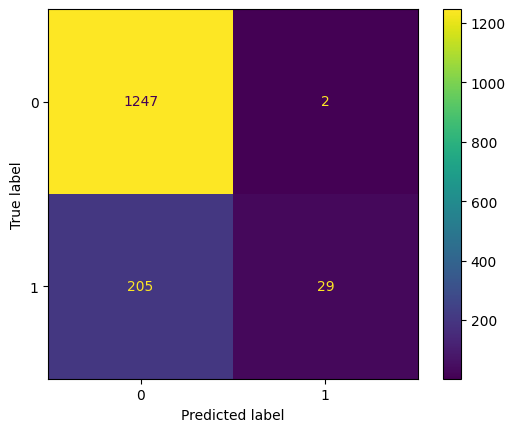

,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Val,0.832884,0.586667,1.0,0.173333,0.295455,296,0,62,13


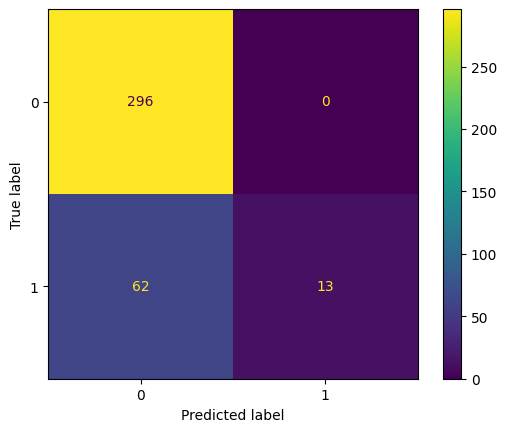

In [14]:
# Entrenamos el modelo
sgdc_default = SGDClassifier(random_state=random_seed)
sgdc_default.fit(X_train, y_train)

# Obtenemos las predicciones
y_train_pred_sgdc_default = sgdc_default.predict(X_train)
y_val_pred_sgdc_default = sgdc_default.predict(X_val)

# Calculamos las métricas
show_metrics(y_train, y_train_pred_sgdc_default, "Métricas en Train")
show_metrics(y_val, y_val_pred_sgdc_default, "Métricas en Val")

Lo cual implica una buena primera aproximación a la clasificación, pero que, obviamente, puede ser mejorada con el ajuste de los hiperparámetros. Para un mejor análisis, comparemos las métricas obtenidas de entrenamiento y evaluación:


In [15]:
compare_metrics(y_train, y_train_pred_sgdc_default, y_val,
                y_val_pred_sgdc_default, "Train", "Val")

Gracias a ello, podemos notar cómo el modelo identifica bien a los registros que cumplen con el préstamo, pero no a aquellos que lo incumplen. Esto no nos sirve, dado que lo que queremos es identificar a los que incumplen con el préstamo para poder tomar medidas preventivas.

Esta situación se puede observar por la _balanced accuracy_ de $0.56$ en entrenamiento y $0.58$, que nos indica que el modelo no es capaz de clasificar correctamente a los registros de la clase minoritaria.

Ahora, con ello, tenemos la base sobre la cual notar los beneficios que existen al poder ajustar los hiperparámetros de nuestro modelo.


#### 5.1.2. Modelos Lineales de Clasificación con hiperparámetros ajustados


En este punto, probaremos varios modelos con diferentes hiperparámetros para ver cuál es el que mejor se ajusta a nuestro _dataset_ y nuestro problema de predicción. Por ello mismo, usaremos _GridSearchCV_ para probar todas las combinaciones posibles y _5-fold cross validation_ (se usa internamente dentro de _GridSearchCV_) para calcular el rendimiento de nuestro modelo en diferentes conjuntos de entrenamiento y evaluación (para asegurarnos que el modelo generalice bien a datos no vistos y no esté sobreajustado, i.e., overfitting, a los datos de entrenamiento).


In [16]:
# Cross validation con 5 folds y scoring 'balanced accuracy'
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001],
    'max_iter': [1000, 2000, 3000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01],
}

sgdc_adjusted = SGDClassifier(random_state=random_seed)

grid_cv = GridSearchCV(sgdc_adjusted, param_grid,
                       scoring='balanced_accuracy', cv=5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=10),
             param_grid={'alpha': [0.0001, 0.001], 'eta0': [0.001, 0.01],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='balanced_accuracy')

In [17]:
# Obtener la tabla con los resultados (parámetros, balanced accuracy y su varianza)
header = [x for x in param_grid.keys()] + ['mean_test_score', 'std_test_score']
values = [grid_cv.cv_results_['param_' + x if i <
                              len(header) - 2 else x] for i, x in enumerate(header)]

# Crear un DataFrame con los resultados y ordenar por mean_test_score
sgdc_adjusted_results = pd.DataFrame({k: v for k, v in zip(header, values)})
sgdc_adjusted_results = sgdc_adjusted_results.sort_values(
    'mean_test_score', ascending=False)
sgdc_adjusted_results = sgdc_adjusted_results.round(5)

# Mostrar los resultados de forma interactiva
fig = go.Figure(data=[go.Table(
    header=dict(values=list(sgdc_adjusted_results.columns),
                fill_color='paleturquoise', align='left'),
    cells=dict(values=[sgdc_adjusted_results[x] for x in sgdc_adjusted_results.columns], fill_color='lavender', align='left'))
])

fig.update_layout(
    title_text="Resultados de los ajustes de hiperparámetros para SGDClassifier")

fig.show()

Gracias a lo cual podemos ver todos los resultados y el rendimiento de cada uno de los modelos con cada combinación de hiperparámetros posible (de los que probamos). Por ello mismo, consideremos ahora el mejor de todos ellos (_notar que no necesariamente es el primero en la tabla anterior, porque puede haber varios empates en el score_):


In [18]:
# Ver los mejores hiperparámetros
display(pd.DataFrame(grid_cv.best_params_, index=['Valor']))

,alpha,eta0,learning_rate,loss,max_iter,penalty
Valor,0.0001,0.01,constant,perceptron,1000,l2


Ahora, dado esto, calculemos las métricas de evaluación para el mejor modelo obtenido, con el objetivo de poder realizar una comparación con el caso anterior (_por default_):


,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Train,0.853001,0.674839,0.544944,0.41453,0.470874,1168,81,137,97


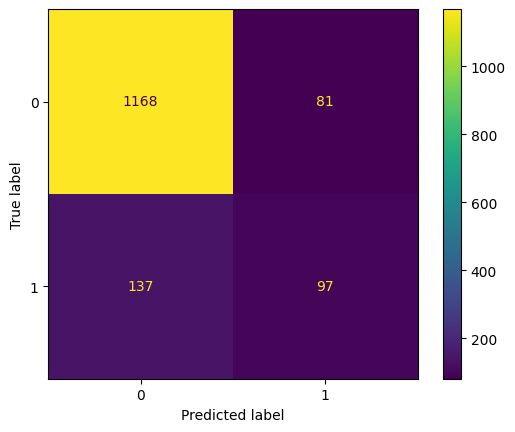

,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Val,0.822102,0.669505,0.584906,0.413333,0.484375,274,22,44,31


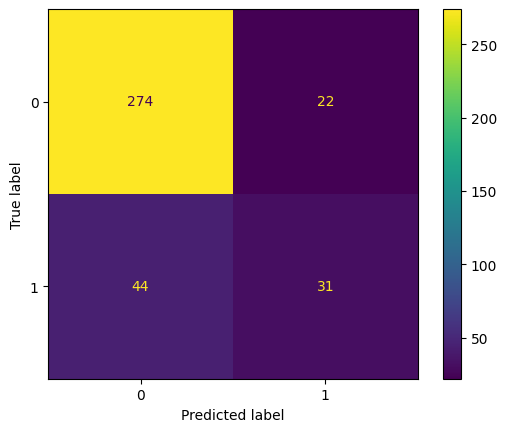

In [19]:
# Calcular el rendimiento del mejor modelo
sgdc_best_model = grid_cv.best_estimator_

y_train_pred_sgdc_adj = sgdc_best_model.predict(X_train)
y_val_pred_sgdc_adj = sgdc_best_model.predict(X_val)

show_metrics(y_train, y_train_pred_sgdc_adj, "Métricas en Train")
show_metrics(y_val, y_val_pred_sgdc_adj, "Métricas en Val")

Con ello, entonces, podemos notar que el modelo le sigue errando bastante pero que ahora intenta ser más balanceado respecto a la predicción de ambas clases. Esto lo podemos notar dado que nuestra precisión bajó considerablemente (al tener varios casos donde se dice que una persona incumplirá pero no), pero nuestro recall subió mucho (porque ahora el modelo intenta clasificar mejor a los que incumplen con el préstamo).

Por este motivo, la _balanced accuracy_ subió a $0.66$, lo cual es un avance respecto al modelo con hiperparámetros por defecto. Podemos ver la comparativa para el mejor modelo y el modelo por defecto:


In [20]:
compare_metrics(y_train, y_train_pred_sgdc_default, y_train,
                y_train_pred_sgdc_adj, "Train Default", "Train Ajustado")
compare_metrics(y_val, y_val_pred_sgdc_default, y_val,
                y_val_pred_sgdc_adj, "Val Default", "Val Ajustado")

Aquí puede notarse muchísimo la diferencia que marcamos anteriormente, dado que el modelo trata ahora de identificar bien los valores de la clase minoritaria, pese a equivocarse ahora con la mayoritaria. Igualmente, esto es un avance, dado que para un problema de clasificación de este tipo, es más importante identificar bien a los que incumplen con el préstamo que a los que no.

Además, algo a tener en cuenta, además, es que la baja de rendimiento en el conjunto de entrenamiento se debe a que el cálculo de mejor modelo se realiza con _5-fold cross validation_, por lo que el modelo final es el que mejor generaliza a datos no vistos y evita overfitting.


### 5.2. Modelos de Árboles de Decisión


Se trabajará de forma totalmente análoga a lo realizado en el punto anterior, pero considerando ahora el uso de los modelos de _Árboles de Decisión_ , más específicamente de _DecisionTreeClassifier_.

De este modo, se procederá a realizar un análisis previo con los _hiperparámetros_ por defecto para ver el rendimiento de nuestro modelo, y luego lo compararemos con las variantes que hay si los ajustamos. Esto nos dará una idea de lo importante que es la correcta elección de los _hiperparámetros_ para obtener un modelo eficiente, preciso y certero.


#### 5.2.1. Modelos de Árboles de Decisión con hiperparámetros por defecto


Si procedemos a realizar la predicción de _Target_ con _DecisionTreeClassifier_ con los hiperparámetros por defecto, obtenemos lo siguiente:


,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Train,1.0,1.0,1.0,1.0,1.0,1249,0,0,234


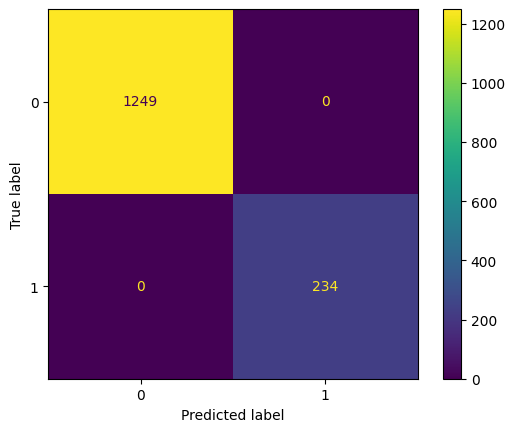

,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Val,0.867925,0.77786,0.691176,0.626667,0.657343,275,21,28,47


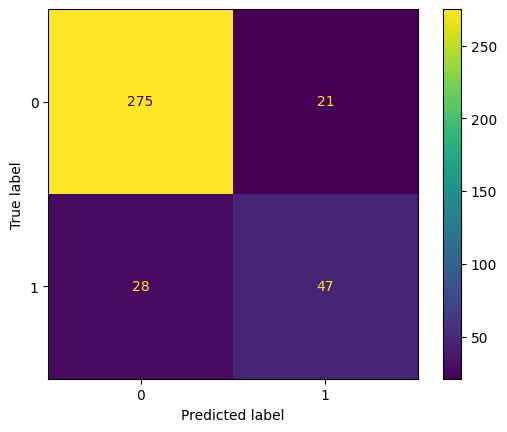

In [21]:
# Entrenamos el modelo
dtc_default = DecisionTreeClassifier(random_state=random_seed)
dtc_default.fit(X_train, y_train)

# Obtenemos las predicciones
y_train_pred_dtc_default = dtc_default.predict(X_train)
y_val_pred_dtc_default = dtc_default.predict(X_val)

# Calculamos las métricas
show_metrics(y_train, y_train_pred_dtc_default, "Métricas en Train")
show_metrics(y_val, y_val_pred_dtc_default, "Métricas en Val")

Lo cual es, claramente, un rotundo sobreajuste sobre los datos de entrenamiento. Esto se puede ver más a detalle en la comparativa de las métricas de los dos conjuntos de datos:


In [22]:
compare_metrics(y_train, y_train_pred_dtc_default, y_val,
                y_val_pred_dtc_default, "Train", "Val")

Por ello, pese a que sean bastante mejores los valores obtenidos (dado que identifica mejor a las personas que incumplen con el préstamo y se encuentra más balanceada la predicción de cada clase) para el conjunto de evaluación respecto a los obtenidos con _SGDClassifier_, el sobreajuste es un problema que debemos solucionar. Para ello, trabajaremos con el ajuste de los hiperparámetros y _5-fold cross validation_ para que el modelo generalice bien a datos no vistos.


#### 5.2.2. Modelos de Árboles de Decisión con hiperparámetros ajustados


Por el sobreajuste notado en el punto anterior, procederemos a ajustar los hiperparámetros de nuestro modelo para obtener un mejor rendimiento en el conjunto de evaluación. Para ello, usaremos _GridSearchCV_ para probar todas las combinaciones posibles y _5-fold cross validation_ para calcular el rendimiento de nuestro modelo en diferentes conjuntos de entrenamiento y evaluación, evitando así el sobreajuste y favoreciendo la generalización del modelo para datos no vistos.


In [23]:
# Cross validation con 5 folds y scoring 'balanced accuracy'
param_grid_2 = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10],
    'min_impurity_decrease': [0.0, 0.1],
    'ccp_alpha': [0.0, 0.1]
}

dtc_adjusted = DecisionTreeClassifier(random_state=random_seed)

grid_cv_2 = GridSearchCV(dtc_adjusted, param_grid_2,
                         scoring='balanced_accuracy', cv=5)
grid_cv_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'ccp_alpha': [0.0, 0.1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 10],
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [24]:
# Obtener la tabla con los resultados (parámetros, balanced accuracy y su varianza)
header_2 = [x for x in param_grid_2.keys()] + ['mean_test_score',
                                               'std_test_score']
values_2 = [grid_cv_2.cv_results_['param_' + x if i <
                                  len(header_2) - 2 else x] for i, x in enumerate(header_2)]

# Crear un DataFrame con los resultados y ordenar por mean_test_score
dtc_adjusted_results = pd.DataFrame({k: v for k, v in zip(header_2, values_2)})
dtc_adjusted_results = dtc_adjusted_results.sort_values(
    'mean_test_score', ascending=False)
dtc_adjusted_results = dtc_adjusted_results.round(5)

# Mostrar los resultados de forma interactiva
fig = go.Figure(data=[go.Table(
    header=dict(values=list(dtc_adjusted_results.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dtc_adjusted_results[x] for x in dtc_adjusted_results.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(
    title_text="Resultados de los ajustes de hiperparámetros para DecisionTreeClassifier")

fig.show()

Gracias a lo cual podemos ver todos los resultados y el rendimiento de cada uno de los modelos con cada combinación de hiperparámetros posible (de los que probamos). Por ello mismo, consideremos ahora el mejor de todos ellos (_notar que no necesariamente es el primero en la tabla anterior, porque puede haber varios empates en el score_):


In [25]:
# Ver los mejores hiperparámetros
display(pd.DataFrame(grid_cv_2.best_params_, index=['Valor']))

,ccp_alpha,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,splitter
Valor,0.0,entropy,None,None,None,0.0,1,2,best


Ahora, dado esto, calculemos las métricas de evaluación para el mejor modelo obtenido, con el objetivo de poder realizar una comparación con el caso anterior (_por default_):


,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Train,1.0,1.0,1.0,1.0,1.0,1249,0,0,234


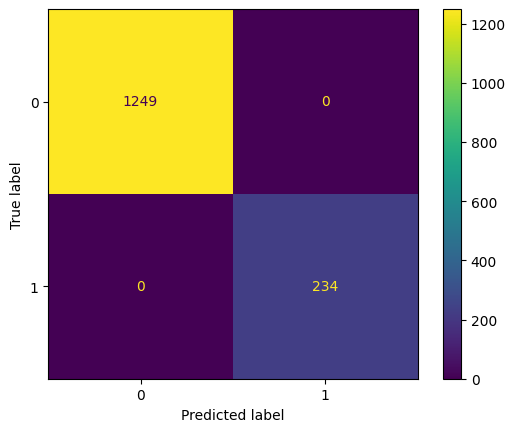

,accuracy,balanced_accuracy,precision,recall,f1,TN,FP,FN,TP
Métricas en Val,0.892183,0.812973,0.761194,0.68,0.71831,280,16,24,51


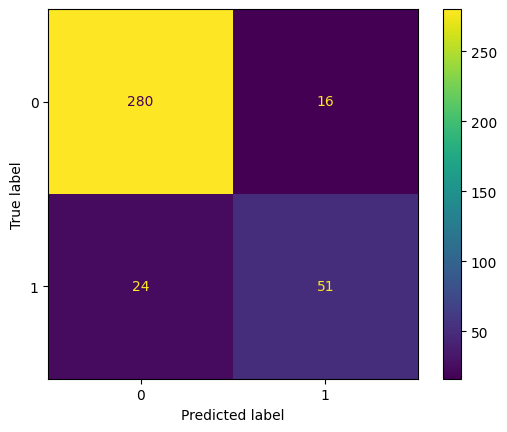

In [26]:
# Calcular el rendimiento del mejor modelo
dtc_best_model = grid_cv_2.best_estimator_

y_train_pred_dtc_adj = dtc_best_model.predict(X_train)
y_val_pred_dtc_adj = dtc_best_model.predict(X_val)

show_metrics(y_train, y_train_pred_dtc_adj, "Métricas en Train")
show_metrics(y_val, y_val_pred_dtc_adj, "Métricas en Val")

Gracias a lo cual notamos un aumento considerablemente grande en la exactitud balanceada por clase del modelo, dado que llegamos al $81\%$ en el conjunto de evaluación. Esto es un avance muy grande respecto al modelo con hiperparámetros por defecto, dado que ahora el modelo es capaz de identificar mucho mejor a los registros que incumplen con el préstamo.

Otro aspecto a destacar, y que resultó diferente a lo esperado, es que el mejor modelo obtenido para los casos en general sigue teniendo sobreajuste sobre el conjunto de entrenamiento, dado que todos los valores que obtenemos son $1$ (lo cual es un claro indicador de que el modelo memorizó los datos de entrenamiento).

Ahora, si queremos comparar el mejor modelo obtenido con el modelo por defecto, podemos hacerlo de la siguiente manera:


In [27]:
compare_metrics(y_train, y_train_pred_dtc_default, y_train,
                y_train_pred_dtc_adj, "Train Default", "Train Ajustado")
compare_metrics(y_val, y_val_pred_dtc_default, y_val,
                y_val_pred_dtc_adj, "Val Default", "Val Ajustado")

De este modo, se visualiza cómo se sigue overfitteando a los datos de entrenamiento, pero que funciona muchísimo mejor en el conjunto de evaluación, identificando más claramente a los registros que incumplen con el préstamo.


### 5.3. Comparación de Modelos


Si comparamos la performance de los mejores modelos obtenidos en los puntos anteriores (los ajustados), tenemos lo siguiente:


In [28]:
compare_metrics(y_train, y_train_pred_sgdc_adj, y_train,
                y_train_pred_dtc_adj, "Train SGDClassifier", "Train DecisionTreeClassifier")
compare_metrics(y_val, y_val_pred_sgdc_adj, y_val,
                y_val_pred_dtc_adj, "Val SGDClassifier", "Val DecisionTreeClassifier")

Gracias a lo cual se puede notar que el mejor modelo utilizado fue el de _DecisionTreeClassifier_ con hiperparámetros ajustados, dado que obtuvo un mejor rendimiento en absolutamente todas las métricas de evaluación, con una diferencia enorme dado que identifica mejor a los incumplidores con el préstamo.

Por ello mismo, podemos concluir que el modelo de _DecisionTreeClassifier_ es el que mejor se ajusta a nuestro problema de predicción de _Target_ en este caso.


## 6. Conclusiones


Finalmente, entonces, gracias a la realización de este laboratorio, pudimos poner en práctica los conocimientos adquiridos en la materia, trabajando con un conjunto de datos real e introduciéndonos en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

Por ello mismo, pudimos ver que el ajuste de los hiperparámetros de los modelos es un factor importantísimo para mejorar el rendimiento de los mismos, y que el modelo de _DecisionTreeClassifier_ es el que mejor se ajusta a nuestro problema de predicción de _Target_ en este caso.
